# <font color=red>MOVIE RECOMMENDATION SYSTEM PROJECT: </font>

In [ ]:
# importing the necessary libraries

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
import matplotlib.pyplot as plt

# <font color=orange> IMPORTING DATA SETS:</font>

In [2]:
# now we have to import two datasets with one having being movies and one being the ratings

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# <font color=orange> EXPLORING DATA SETS:</font>

In [3]:
# exploring the movies dataset

print("The size of the movies dataset:",movies.shape)
pd.set_option('display.max_columns', None)
movies

The size of the movies dataset: (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
# exploring the ratings dataset

print("The size of the ratings dataset:",ratings.shape)
ratings

The size of the ratings dataset: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# <font color=red>NOTE:</font>
# <font color=red>The interpretation is harder to extract from this dataset so we create a new dataframe such that each coloum would represent each unique userId and each row correspons to unique movieId.</font>

In [5]:
# pivot is an function which returns reshaped dataframe and normally 
# index---> rows of the dataframe
# coloumns---> coloumn of the dataframe
# values ---> represents the values of the varaiable of that combination and 
# returns NaN values when any missing data is found

final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
pd.set_option('display.max_columns',20)
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# now final dataset is easy to interpret the dataframe and we replace NaN with 0 so it would be easy for the algoriithm so we 
# use fillna function to do the task

final_dataset.fillna(0,inplace=True)
print("The Final DatSset for the Model is: ")

final_dataset

The Final DatSset for the Model is: 


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset containing the count of each genre movies: 


,count
Adventure,1263
Animation,611
Children,664
Comedy,3756
Fantasy,779
Romance,1596
Drama,4361
Action,1828
Crime,1199
Thriller,1894


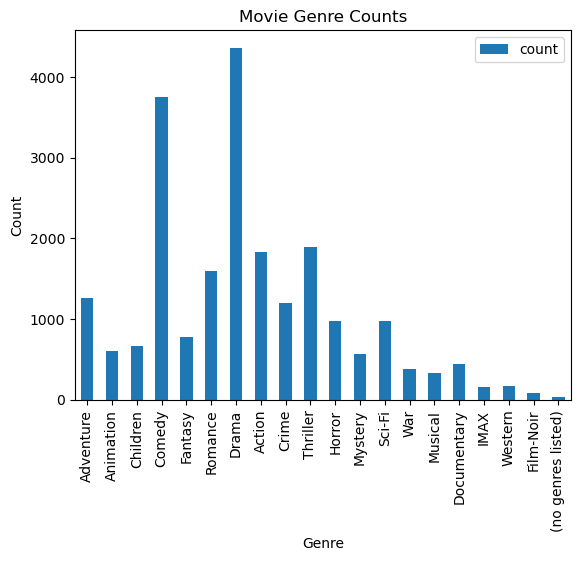

In [7]:
# now let us see the count of movies in each genre
# extract the genres column from the dataframe

genres_series = movies['genres']

# create a dictionary to count the movies in each genre
genre_counts = {}
for genres in genres_series:
    # split the string of genres into a list of individual genres
    genre_list = genres.split('|')
    for genre in genre_list:
        # increment the count for the genre in the dictionary
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

            
# convert the dictionary to a pandas dataframe
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])

# displayinh the genre_counts_df
print("The dataset containing the count of each genre movies: ")
display(genre_counts_df.head(20))


# create a bar plot of the genre counts
genre_counts_df.plot(kind='bar')
plt.title('Movie Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [8]:
# now let us find the count of no of movies released in 
# each year in the descending order

import re

# title column in dataset which contains year in it
year_series=movies['title']
year_counts={}

for year in year_series:
    # we have used findall to extract all the substrings in bracket and from the dataset and in the last bracket we have year
    year_list=re.findall(r'\(.*?\)',year)
    if(len(year_list)>1):
        n=len(year_list)
        new_list=[]
        new_list.append(year_list[n-1])
        year_list=new_list
    
    for year in year_list:
        # increment the count for the year in the dictionary
        if year in year_counts:
            year_counts[year] += 1
        else:
            year_counts[year] = 1

# convert the dictionary to a pandas dataframe           
year_counts_df = pd.DataFrame.from_dict(year_counts, orient='index', columns=['count'])

# now sorting the data frame in descending order
result_df = year_counts_df.sort_values(by = 'count',ascending = False)
print("The dataset containing the count of movies released in each year: ")
display(result_df.head(107))


The dataset containing the count of movies released in each year: 


,count
(2002),311
(2006),295
(2001),294
(2007),284
(2000),283
...,...
(1921),1
(1902),1
(1915),1
(1903),1


# <font color=orange>REMOVING NOISE FROM DATA: </font>

In [9]:
# ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users. 
# So with all that taken into account and some trial and error experimentations,  we will reduce the noise by adding 
# some filters for the final dataset.

# To qualify a movie, a minimum of 10 users should have voted a movie.
# To qualify a user, a minimum of 50 movies should have voted by the user.

# so we have grouped them accordingly and used agg (aggregrate function) to counts no of ratings for each movieId and 
# and number of ratings given by each user.

no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [10]:
print("The number of ratings given for each movie: ")
display(no_user_voted.head(9724))

The number of ratings given for each movie: 


movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [11]:
print("The number of ratings given by each UserId: ")
display(no_movies_voted.head(610))

The number of ratings given by each UserId: 


userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

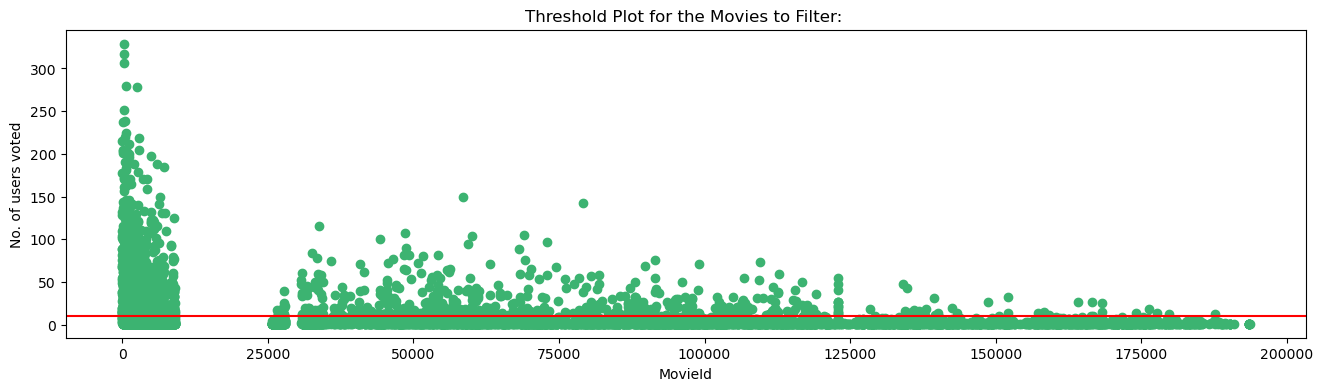

In [12]:
# Let’s visualize the number of users who voted with our threshold of 10.
# So we found the movieId having more than 10 users voted

# it creates a subplot of width=16 and height=4
f,ax = plt.subplots(1,1,figsize=(16,4))
# creates a scatter plot with the x-axis representing the movie IDs and the y-axis representing 
# number of users who have voted for each movie.
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
# adds a horizontal line at y=10 to indicate the threshold for the minimum number of users who have voted for a movie.
plt.axhline(y=10,color='r')

plt.title("Threshold Plot for the Movies to Filter: ")
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [13]:
# now forming the new dataset with necessary modifications of threshold as shown above
# now first we are filtering the rows first as per above threshold

# loc function is used to filter only specific rows and we have written the necessary condtion for threshold 
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


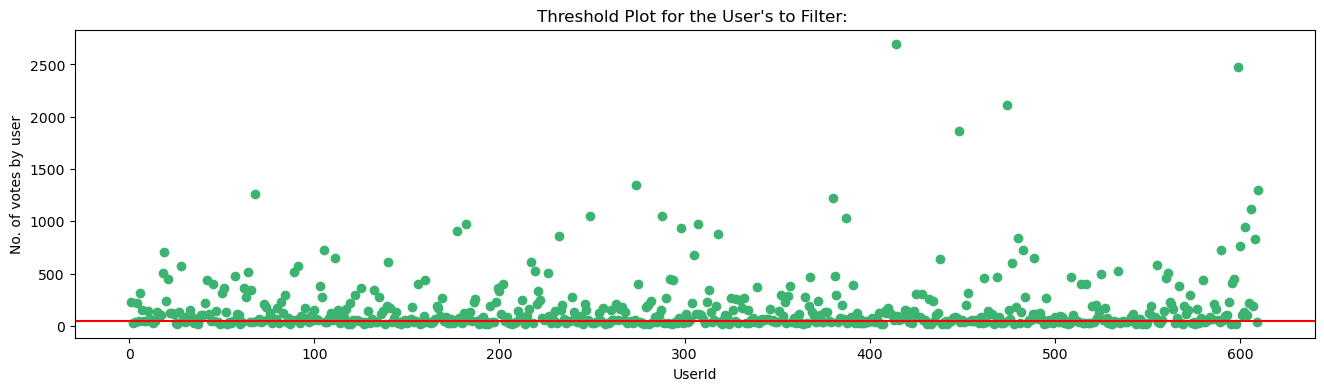

In [14]:
# Let’s visualize the number of votes by each user with our threshold of 50.
# so we found the usersId having more than 50 votes

# it creates a subplot of width=16 and height=4
f,ax = plt.subplots(1,1,figsize=(16,4))
# creates a scatter plot with the x-axis representing the user IDs and the y-axis representing 
# number of movies voted for each user.
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
# adds a horizontal line at y=50 to indicate the threshold for the minimum number of movies voted by each user.
plt.axhline(y=50,color='r')

plt.title("Threshold Plot for the User's to Filter: ")
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [15]:
# now forming the new dataset with necessary modifications of threshold as shown above
# now we are filtering the colomns as per above threshold

# loc function is used to filter only specific colomns and we have written the necessary condtion for threshold 
final_dataset= final_dataset.loc[:,no_movies_voted[no_movies_voted>50].index]
print(" This is the final Dataset After Removing the unnecessary noise: ")
final_dataset

 This is the final Dataset After Removing the unnecessary noise: 


userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <font color=orange> REMOVING SPARSITY FROM DATA: </font>

In [16]:
# for reducing the sparsity from the data we use csr_matrix function from the scipy library.
# it creates a Compressed Sparse Row matrix representation of a 2D array. 
# where each row of the matrix is stored as a sequence of indices and values, instead of storing every element of the matrix.

csr_data = csr_matrix(final_dataset.values)

In [17]:
# it resets the index of the final_dataset DataFrame to the default integer index and modifies the DataFrame in-place
# that is starting from 0 and increment by 1.

final_dataset.reset_index(inplace=True)

# <font color=orange> MOVIE RECOMMENDATION SYSTEM MODEL:</font>

In [18]:
# we will use knn algorithm along with cosine similaritty which is much better than pearson coefficient

# cosine distance is similarity measure between two vectors that measures cosine of angle between them it is used here.
# brute alogithm is used here to find the k nearest neighbors by computing the distance between each pair of points 
# in the dataset.
# number of neighbors to 20 using the n_neighbors parameter.
# the number of jobs to use for parallelization to -1 using the n_jobs parameter. 
# it specifies the number of CPU cores to use for parallel processing. A value of -1 means to use all available cores.

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# Fits the NearestNeighbors model to the data using the fit() method of the knn object.
# This trains the model on the input data, which is a sparse matrix created from the final_dataset DataFrame.
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# <font color=orange>MAKING RECOMMENDATION FUNCTION: </font>

In [19]:
# We first check if the movie name input is in the database and if it is we use our recommendation system We try
# to find similar movies and sort them based on their similarity distance and output only the top 10 movies with their 
# distances from the input movie.

def get_movie_recommendation(movie_name):
    # it says the no of movies to recommend
    n_movies_to_reccomend = 10
    # it stores all the movies with name begin susstring of given movie name
    movie_list = movies[movies['title'].str.contains(movie_name)]
    
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        # it finds all the n nearest neighbours 
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_reccomend+1)  
        
        # then it sorts in ascending order of the distance and remove the gIen movie from the list
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1],reverse=False)[1::1]
        recommend_frame = []
        
        # now we append all the movie name,genre ,distance to recommend frame
        for val in rec_movie_indices:   
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            genres = movies.iloc[idx]['genres'].values[0]
            recommend_frame.append({
                'Title': movies.iloc[idx]['title'].values[0],
                'Distance': val[1],
                'Genres': genres
            })
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

# <font color=orange>Recommedation of Some Movies: </font>

In [20]:
movie_name=input("Enter the Movie name: ")
get_movie_recommendation(movie_name)

Enter the Movie name: Iron Man


,Title,Distance,Genres
1,"Avengers, The (2012)",0.285319,Action|Adventure|Sci-Fi|IMAX
2,"Dark Knight, The (2008)",0.285835,Action|Crime|Drama|IMAX
3,WALL·E (2008),0.298138,Adventure|Animation|Children|Romance|Sci-Fi
4,Iron Man 2 (2010),0.307492,Action|Adventure|Sci-Fi|Thriller|IMAX
5,Avatar (2009),0.310893,Action|Adventure|Sci-Fi|IMAX
6,Batman Begins (2005),0.362759,Action|Crime|IMAX
7,Star Trek (2009),0.366029,Action|Adventure|Sci-Fi|IMAX
8,Watchmen (2009),0.368558,Action|Drama|Mystery|Sci-Fi|Thriller|IMAX
9,Guardians of the Galaxy (2014),0.368758,Action|Adventure|Sci-Fi
10,Up (2009),0.368857,Adventure|Animation|Children|Drama


In [21]:
movie_name=input("Enter the Movie name: ")
get_movie_recommendation(movie_name)

Enter the Movie name: Four Weddings and a Funeral


,Title,Distance,Genres
1,Pretty Woman (1990),0.448592,Comedy|Romance
2,Sleepless in Seattle (1993),0.449504,Comedy|Drama|Romance
3,Dave (1993),0.459519,Comedy|Romance
4,Ghost (1990),0.463938,Comedy|Drama|Fantasy|Romance|Thriller
5,Dances with Wolves (1990),0.468070,Adventure|Drama|Western
6,Get Shorty (1995),0.473737,Comedy|Crime|Thriller
7,Mrs. Doubtfire (1993),0.477842,Comedy|Drama
8,Forrest Gump (1994),0.482075,Comedy|Drama|Romance|War
9,Don Juan DeMarco (1995),0.492950,Comedy|Drama|Romance
10,"Fugitive, The (1993)",0.502996,Thriller


In [22]:
movie_name=input("Enter the Movie name: ")
get_movie_recommendation(movie_name)

Enter the Movie name: How to Lose a Guy in 10 Days


,Title,Distance,Genres
1,Maid in Manhattan (2002),0.373886,Comedy|Romance
2,"Wedding Date, The (2005)",0.457807,Comedy|Romance
3,"Ugly Truth, The (2009)",0.466156,Comedy|Drama|Romance
4,Mean Girls (2004),0.488317,Comedy
5,"Wedding Planner, The (2001)",0.489605,Comedy|Romance
6,Sweet Home Alabama (2002),0.490899,Comedy|Romance
7,"Walk to Remember, A (2002)",0.495647,Drama|Romance
8,Legally Blonde (2001),0.505889,Comedy|Romance
9,"Holiday, The (2006)",0.517671,Comedy|Romance
10,Bring It On (2000),0.528818,Comedy
